In [59]:
import pandas as pd
from bamt.networks.hybrid_bn import HybridBN
from sklearn import preprocessing as pp
import bamt.preprocessors as preprocessor
from pgmpy.estimators import K2Score
import seaborn as sns

In [60]:
data = pd.read_csv('hack_processed_with_rf.csv')
data

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/offshore,...,Period,Lithology,Gross,Netpay,Porosity,Permeability,Oil density,Oil recovery factor,Condensate recovery factor,Gas recovery factor
0,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,...,JURASSIC,LIMESTONE,75.0,55.2,21.0,410.0,839.762611,NaN,NaN,NaN
1,ABU GHARADIG,BAHARIYA,EGYPT,AFRICA,ABU GHARADIG,EXTENSION,29.7422,28.4925,GUPCO,ONSHORE,...,CRETACEOUS,SANDSTONE,223.5,43.2,10.0,8.0,NaN,NaN,NaN,0.84
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,ONSHORE,...,NEOGENE,THINLY-BEDDED SANDSTONE,34.5,19.8,22.0,200.0,NaN,NaN,NaN,0.75
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),EGYPT,AFRICA,NILE DELTA,STRIKE-SLIP,31.4382,31.3616,IEOC,ONSHORE,...,NEOGENE,SANDSTONE,152.7,123.0,20.0,300.0,779.614325,NaN,NaN,0.78
4,AL HUWAISAH,SHUAIBA,OMAN,MIDDLE EAST,FAHUD SALT,COMPRESSION,21.9607,56.0452,PDO,ONSHORE,...,CRETACEOUS,LIMESTONE,75.0,30.0,21.0,60.0,825.072886,0.26,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,ONSHORE,...,PALEOGENE,SANDSTONE,49.2,18.6,23.2,121.0,946.488294,0.13,NaN,NaN
510,ZAOYUAN,KONGDIAN-2 (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,NaN,38.2100,117.0600,PETROCHINA,ONSHORE,...,PALEOGENE,SANDSTONE,88.5,23.7,NaN,60.0,881.619938,0.19,NaN,NaN
511,ZAOYUAN,UNNAMED (FENGHUADIAN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,ONSHORE,...,MESOZOIC,VOLCANICS,147.6,58.2,12.7,3.6,870.769231,0.05,NaN,NaN
512,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,...,CARBONIFEROUS,SANDSTONE,78.6,9.9,24.0,30.0,887.147335,0.24,NaN,NaN


In [61]:
columns = ['Tectonic regime', 'Structural setting', 'Depth', 'Period', 'Lithology', 'Gross', 'Netpay',
       'Porosity', 'Permeability']

In [62]:
data = data[columns]
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data

,Tectonic regime,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,COMPRESSION,FORELAND,1815.0,JURASSIC,LIMESTONE,75.0,55.2,21.0,410.0
1,EXTENSION,RIFT,3084.6,CRETACEOUS,SANDSTONE,223.5,43.2,10.0,8.0
2,STRIKE-SLIP,WRENCH,2952.9,NEOGENE,THINLY-BEDDED SANDSTONE,34.5,19.8,22.0,200.0
3,STRIKE-SLIP,WRENCH,3149.7,NEOGENE,SANDSTONE,152.7,123.0,20.0,300.0
4,COMPRESSION,SALT,1486.5,CRETACEOUS,LIMESTONE,75.0,30.0,21.0,60.0
...,...,...,...,...,...,...,...,...,...
437,EXTENSION,RIFT,1615.2,PALEOGENE,SANDSTONE,69.0,20.7,26.7,1872.0
438,EXTENSION,RIFT,1416.3,PALEOGENE,SANDSTONE,49.2,18.6,23.2,121.0
439,EXTENSION,RIFT,2952.9,MESOZOIC,VOLCANICS,147.6,58.2,12.7,3.6
440,COMPRESSION,FORELAND,561.0,CARBONIFEROUS,SANDSTONE,78.6,9.9,24.0,30.0


In [63]:
encoder = pp.LabelEncoder()
discretizer = pp.KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
p = preprocessor.Preprocessor([("encoder", encoder), ("discretizer", discretizer)])
discretized_data, est = p.apply(data)

In [64]:
discretized_data

,Tectonic regime,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,0,2,4,12,9,4,6,6,7
1,2,6,8,7,11,7,6,1,2
2,5,11,8,15,15,2,3,7,6
3,5,11,8,15,11,6,8,6,7
4,0,7,3,7,9,4,5,6,4
...,...,...,...,...,...,...,...,...,...
437,2,6,3,17,11,3,3,8,9
438,2,6,3,17,11,2,3,7,5
439,2,6,8,14,16,6,7,2,1
440,0,2,0,4,11,4,1,7,3


In [65]:
est

{'Tectonic regime': {'COMPRESSION': 0,
  'EVAPORITE': 1,
  'EXTENSION': 2,
  'GRAVITY': 3,
  'INVERSION': 4,
  'STRIKE-SLIP': 5,
  'TRANSPRESSION': 6,
  'TRANSTENSION': 7,
  'UPLIFT': 8},
 'Structural setting': {'BACKARC': 0,
  'DELTA': 1,
  'FORELAND': 2,
  'INTRACRATONIC': 3,
  'INVERSION': 4,
  'PASSIVE MARGIN': 5,
  'RIFT': 6,
  'SALT': 7,
  'SUB-SALT': 8,
  'SUB-THRUST': 9,
  'THRUST': 10,
  'WRENCH': 11},
 'Period': {'ARCHEAN': 0,
  'CAMBRIAN': 1,
  'CAMBRIAN-ORDOVICIAN': 2,
  'CAMBRIAN-ORDOVICIAN/CARBONIFEROUS': 3,
  'CARBONIFEROUS': 4,
  'CARBONIFEROUS-CRETACEOUS': 5,
  'CARBONIFEROUS-PERMIAN': 6,
  'CRETACEOUS': 7,
  'CRETACEOUS-PALEOGENE': 8,
  'DEVONIAN': 9,
  'DEVONIAN-CARBONIFEROUS': 10,
  'DEVONIAN-PERMIAN': 11,
  'JURASSIC': 12,
  'JURASSIC-CRETACEOUS': 13,
  'MESOZOIC': 14,
  'NEOGENE': 15,
  'ORDOVICIAN': 16,
  'PALEOGENE': 17,
  'PALEOGENE-NEOGENE': 18,
  'PALEOZOIC': 19,
  'PALEOZOIC-CRETACEOUS': 20,
  'PERMIAN': 21,
  'PERMIAN-TRIASSIC': 22,
  'PROTEROZOIC': 23,
  '

In [66]:
p.info

{'types': {'Tectonic regime': 'disc',
  'Structural setting': 'disc',
  'Depth': 'cont',
  'Period': 'disc',
  'Lithology': 'disc',
  'Gross': 'cont',
  'Netpay': 'cont',
  'Porosity': 'cont',
  'Permeability': 'cont'},
 'signs': {'Depth': 'pos',
  'Gross': 'pos',
  'Netpay': 'pos',
  'Porosity': 'pos',
  'Permeability': 'pos'}}

In [67]:
bn = HybridBN(has_logit=False, use_mixture=False)
bn.add_nodes(p.info)

In [68]:
bn.add_edges(discretized_data,scoring_function=('K2',K2Score))

  0%|          | 13/1000000 [00:01<28:53:46,  9.61it/s]


In [69]:
bn.plot('Structure.html')

In [70]:
bn.fit_parameters(data)

In [71]:
sample = bn.sample(800)

100%|██████████| 800/800 [00:00<00:00, 5279.87it/s]


In [72]:
sample

,Tectonic regime,Lithology,Structural setting,Netpay,Period,Gross,Porosity,Permeability,Depth
0,COMPRESSION,SANDSTONE,FORELAND,31.637488,CRETACEOUS,272.841587,14.315250,1266.743922,2510.541747
1,EXTENSION,SANDSTONE,RIFT,25.852742,CRETACEOUS,1574.797104,19.910322,845.900369,3381.892050
2,COMPRESSION,SANDSTONE,INTRACRATONIC,7.175459,TRIASSIC,58.620050,19.137865,777.643228,3895.564358
3,COMPRESSION,SANDSTONE,FORELAND,50.187204,CRETACEOUS,349.454071,24.219025,1250.716904,1892.030436
4,GRAVITY,SANDSTONE,DELTA,253.854498,PALEOGENE,550.647249,30.502157,333.105966,2556.165082
...,...,...,...,...,...,...,...,...,...
188,INVERSION,SANDSTONE,RIFT,61.412106,JURASSIC,562.873230,29.310021,134.090118,5104.508973
189,COMPRESSION,SANDSTONE,FORELAND,67.153348,CRETACEOUS,340.338532,30.354665,2014.163347,1034.861237
190,COMPRESSION,SANDSTONE,FORELAND,12.663595,CRETACEOUS,321.088706,14.815758,472.798844,2110.964104
191,COMPRESSION,LIMESTONE,FORELAND,46.325461,PERMIAN,717.856063,16.135212,379.244563,5026.566110


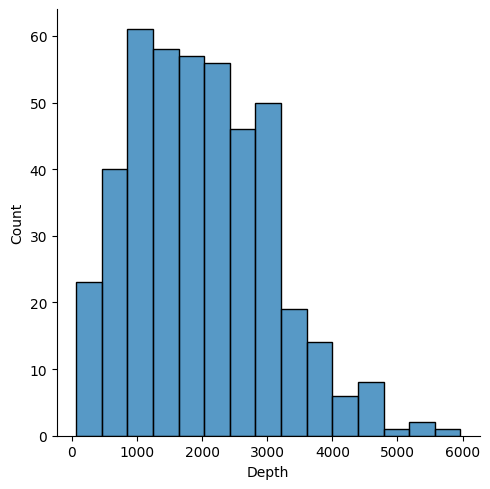

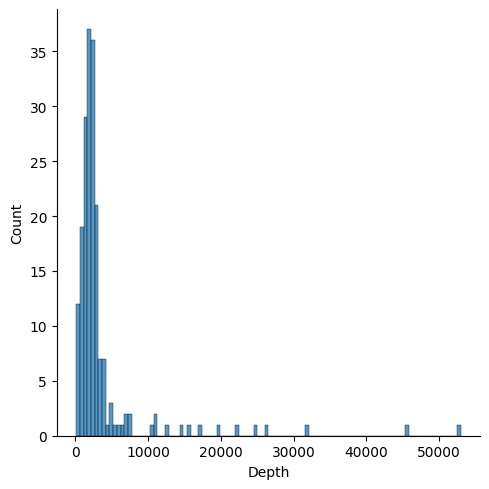

In [73]:
sns.displot(data['Depth'])
sns.displot(sample['Depth'])

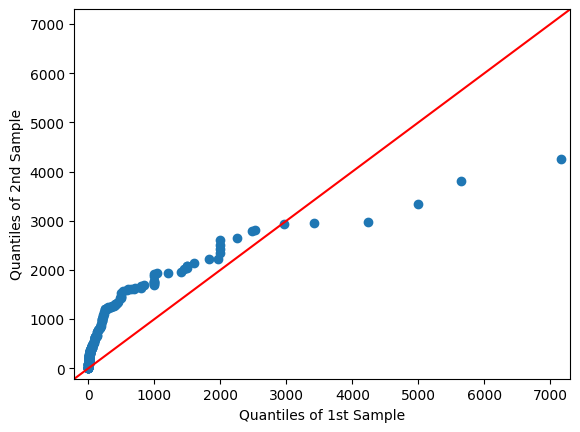

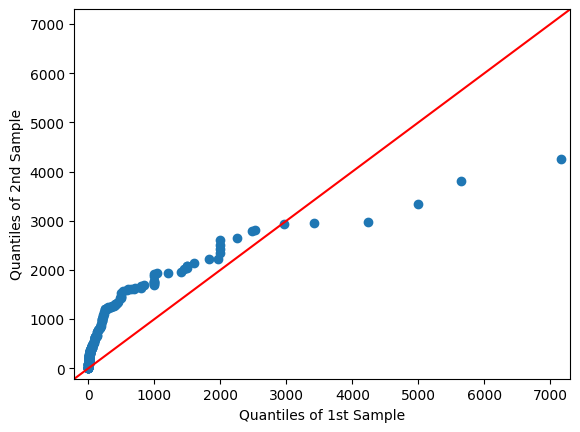

In [74]:
import statsmodels.api as sm
sm.qqplot_2samples(data['Permeability'].values, sample['Permeability'].values, line='45')

In [75]:
sample_discrete, est = p.apply(sample)

In [76]:
d1 = discretized_data['Permeability'].value_counts(normalize=True).to_dict()

In [77]:
d2 = sample_discrete['Permeability'].value_counts(normalize=True).to_dict()

In [78]:
from scipy.spatial import distance
q1 = []
p1 = []
for k in d1:
    q1.append(d1[k])
    p1.append(d2[k])

distance.jensenshannon(q1, p1)

0.01829221227290612

In [79]:
bn = HybridBN(has_logit=False, use_mixture=False)
bn.add_nodes(p.info)
bn.add_edges(discretized_data,scoring_function=('K2',K2Score))

  0%|          | 13/1000000 [00:01<27:42:51, 10.02it/s]


In [80]:
import xgboost
bn.set_regressor({'Permeability':xgboost.XGBRegressor()})
bn.fit_parameters(data)

In [81]:
bn.get_info()

,name,node_type,data_type,parents,parents_types
0,Tectonic regime,Discrete,disc,[],[]
1,Lithology,Discrete,disc,[],[]
2,Structural setting,Discrete,disc,[Tectonic regime],[disc]
3,Netpay,ConditionalGaussian (LinearRegression),cont,"[Tectonic regime, Structural setting, Lithology]","[disc, disc, disc]"
4,Period,Discrete,disc,[Structural setting],[disc]
5,Gross,Gaussian (LinearRegression),cont,[Netpay],[cont]
6,Porosity,ConditionalGaussian (LinearRegression),cont,[Period],[disc]
7,Permeability,ConditionalGaussian (XGBRegressor),cont,"[Porosity, Lithology]","[cont, disc]"
8,Depth,ConditionalGaussian (LinearRegression),cont,"[Porosity, Permeability, Tectonic regime, Period]","[cont, cont, disc, disc]"


In [82]:
sample = bn.sample(1000)

100%|██████████| 1000/1000 [00:00<00:00, 2457.81it/s]


In [83]:
sample.shape

(261, 9)

In [84]:
sample

,Tectonic regime,Lithology,Structural setting,Netpay,Period,Gross,Porosity,Permeability,Depth
0,GRAVITY,SANDSTONE,DELTA,138.631677,PALEOGENE,506.428468,29.993723,2392.816209,12204.385648
1,EXTENSION,SANDSTONE,RIFT,55.074623,CRETACEOUS,1021.195933,20.933568,326.305676,1912.012513
2,COMPRESSION,LIMESTONE,FORELAND,60.224269,PERMIAN,1013.350391,13.354793,446.833984,6406.505694
3,COMPRESSION,LIMESTONE,FORELAND,81.989749,TRIASSIC,67.397036,14.243947,113.923610,1304.021611
4,EXTENSION,SANDSTONE,SUB-SALT,121.874201,CRETACEOUS,83.563936,22.004454,521.978454,2979.932683
...,...,...,...,...,...,...,...,...,...
256,GRAVITY,LIMESTONE,SALT,38.236084,CRETACEOUS,555.458496,21.168565,137.758436,1903.953903
257,COMPRESSION,SANDSTONE,FORELAND,40.429583,CARBONIFEROUS,265.534438,18.455352,1174.487693,1628.016521
258,EXTENSION,SANDSTONE,RIFT,116.653200,PROTEROZOIC,614.319527,13.698192,1173.941546,86920.663125
259,COMPRESSION,SANDSTONE,FORELAND,48.581404,CARBONIFEROUS,1143.467118,8.349324,1828.791436,1708.618416


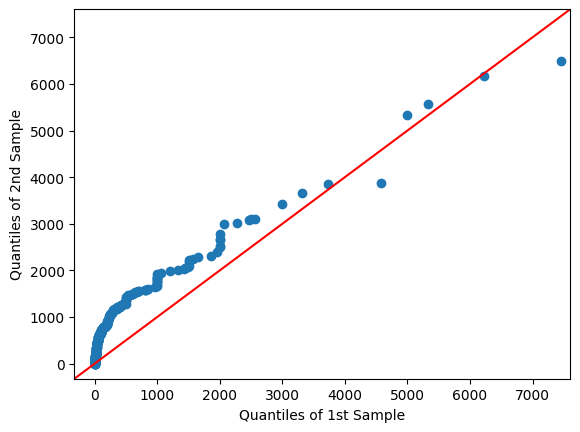

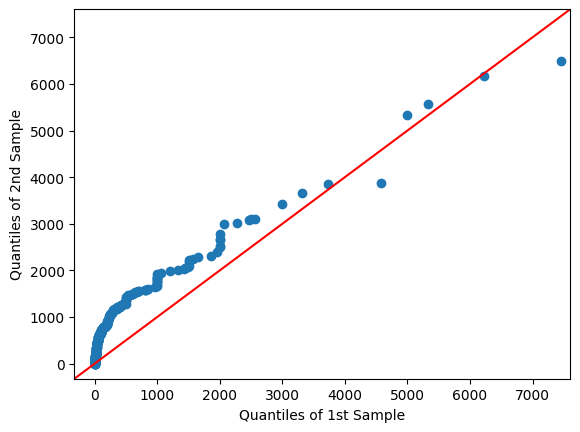

In [85]:
sm.qqplot_2samples(data['Permeability'].values, sample['Permeability'].values, line='45')

In [86]:
sample_discrete, est = p.apply(sample)

In [87]:
d1 = discretized_data['Permeability'].value_counts(normalize=True).to_dict()

In [88]:
d2 = sample_discrete['Permeability'].value_counts(normalize=True).to_dict()

In [89]:
q1 = []
p1 = []
for k in d1:
    q1.append(d1[k])
    p1.append(d2[k])

distance.jensenshannon(q1, p1)

0.01664855402600662

In [90]:
bn = HybridBN(has_logit=False, use_mixture=True)
bn.add_nodes(p.info)
bn.add_edges(discretized_data,scoring_function=('K2',K2Score))
bn.fit_parameters(data)
sample = bn.sample(1000)

100%|██████████| 1000/1000 [00:03<00:00, 322.09it/s]


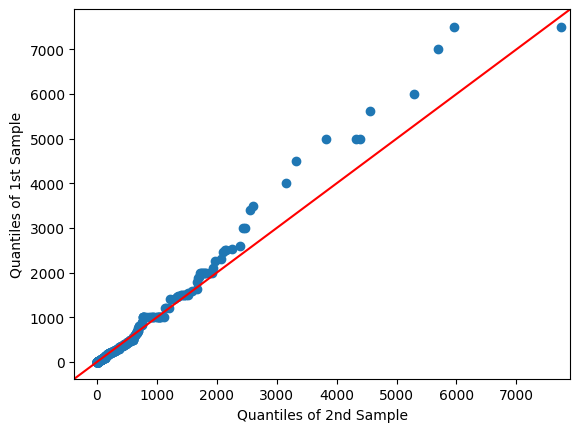

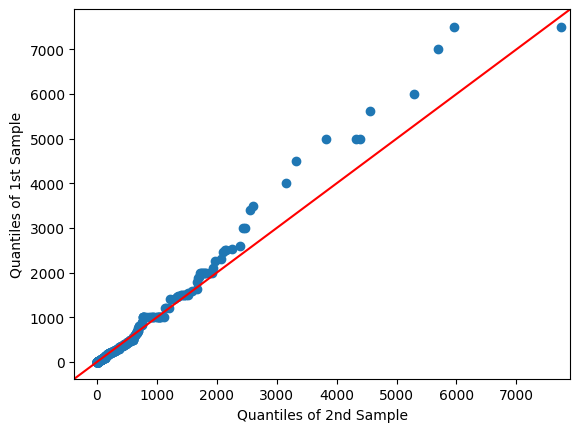

In [91]:
sm.qqplot_2samples(data['Permeability'].values, sample['Permeability'].values, line='45')

In [92]:
sample_discrete, est = p.apply(sample)

In [93]:
d2 = sample_discrete['Permeability'].value_counts(normalize=True).to_dict()

In [94]:
q1 = []
p1 = []
for k in d1:
    q1.append(d1[k])
    p1.append(d2[k])

distance.jensenshannon(q1, p1)

0.015033347217452276